<a href="https://colab.research.google.com/github/lmurayire12/linear_regression_model/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1**: LINEAR REGRESSION

Linear Regression Model with Gradient Descent Optimization

Import Libraries and Dataset


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset
url = 'https://raw.githubusercontent.com/lmurayire12/linear_regression_model/refs/heads/main/dataset.csv'
data = pd.read_csv('https://raw.githubusercontent.com/lmurayire12/linear_regression_model/refs/heads/main/dataset.csv')

# Display first few rows of dataset
data.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


**Data Processing**

In [19]:
# Checking for missing values
print(data.isnull().sum())

# Handling missing values (eg: removing rows with missing pm2.5)
data = data.dropna(subset=['pm2.5'])

# Confirm missing values are removed
data.isnull().sum()


No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64


,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,0
DEWP,0
TEMP,0
PRES,0
cbwd,0


**Selecting Features & Target**

In your dataset:

**Target variable**: pm2.5

**Potential Features**: DEWP, TEMP, PRES, Iws, Is, Ir

In [21]:
# Selecting features and target variable
X = data[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
y = data['pm2.5']

# Spliting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Building Linear Regression Model**

In [22]:
# Initializing and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
predictions = model.predict(X_test)


**Evaluating Model Performance**


In [23]:
# Calculating metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Printing evaluation results
print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Mean Squared Error (MSE): 6765.37
R-squared (R²): 0.23


**Visualization**

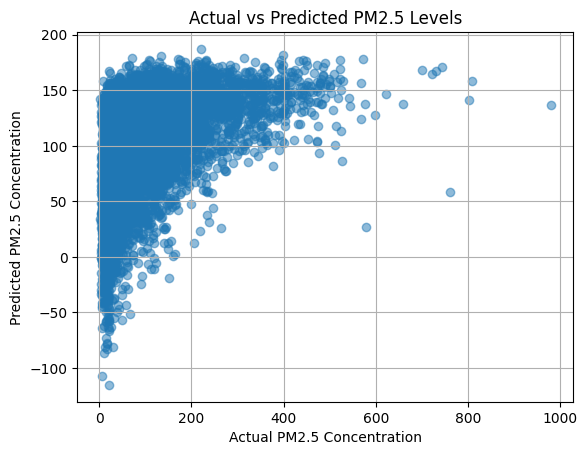

In [24]:
# Actual vs Predicted plot
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual PM2.5 Concentration')
plt.ylabel('Predicted PM2.5 Concentration')
plt.title('Actual vs Predicted PM2.5 Levels')
plt.grid(True)
plt.show()


 **Model Comparison (Linear Regression, Decision Tree, Random Forest)**

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Print comparison results
print("Model Performance Comparison:")
print(f"Linear Regression: MSE={mse:.2f}, R²={r2:.2f}")
print(f"Decision Tree: MSE={dt_mse:.2f}, R²={dt_r2:.2f}")
print(f"Random Forest: MSE={rf_mse:.2f}, R²={rf_r2:.2f}")


Model Performance Comparison:
Linear Regression: MSE=6765.37, R²=0.23
Decision Tree: MSE=6534.01, R²=0.26
Random Forest: MSE=6378.68, R²=0.28


**Save the best perfoming model**

In [26]:
import joblib

# Assuming Random Forest performed best:
joblib.dump(rf_model, 'best_model.pkl')


['best_model.pkl']

 **Prediction**

In [28]:
# Corrected Prediction Script (to avoid the feature name warning)
import joblib
import pandas as pd

# Load the best model
model = joblib.load('best_model.pkl')

# Example new data with the same feature names as training
new_data = pd.DataFrame({
    'DEWP': [2],
    'TEMP': [10.0],
    'PRES': [1012.0],
    'Iws': [3.5],
    'Is': [0],
    'Ir': [0]
})

# Make prediction
predicted_pm25 = model.predict(new_data)
print(f'Predicted PM2.5 concentration: {predicted_pm25[0]:.2f}')


Predicted PM2.5 concentration: 84.60
